# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Balkarn Gill - 30202219

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [ ]:
# TODO: Import dataset and inspect the first five columns

file_path = 'seeds_dataset.txt'
data = pd.read_csv(file_path, sep='\t', header=None)

print(data.head())

       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1


Next, you will need to separate the data into your feature matrix and target vector.

In [ ]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y

# Separate the features and the target
X = data.iloc[:, :-1]  # All rows and all columns except the last one
y = data.iloc[:, -1]   # All rows and only the last column

# Print the shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (210, 7)
Shape of y (target): (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)*

*ANSWER HERE*

Before we implement the scaler, we need to split the data into training and testing sets first.

In [ ]:
# TODO: Split the data into training and testing sets

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# We'll use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [ ]:
# TODO: Print the shape of the training feature matrix and target vector

print("Shape of training feature matrix (X_train):", X_train.shape)
print("Shape of training target vector (y_train):", y_train.shape)


Shape of training feature matrix (X_train): (147, 7)
Shape of training target vector (y_train): (147,)


Now that we have our training data, we can implement our selected scaler.

In [ ]:
# TODO: Scale the data

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and then transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# You can also transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)



### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [ ]:
# TODO: Instantiate model

from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression()

# The model is now ready to be trained on the scaled training data


### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [ ]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [ ]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
              'fit_intercept': [True, False]}

# Instantiate the Logistic Regression model
model = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Print the best cross-validation score
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the model on the test data
test_score = grid_search.score(X_test_scaled, y_test)
print("Test score:", test_score)


Best parameters: {'C': 10.0, 'fit_intercept': True}
Best cross-validation score: 0.9593103448275861
Test score: 0.9206349206349206


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [ ]:
# TODO: Predict y labels using best estimator

# Predict the labels on the test data using the best estimator from the grid search
y_pred = grid_search.best_estimator_.predict(X_test_scaled)


In [ ]:
# TODO: Reduce dimensions of test data for plotting

from sklearn.decomposition import PCA

# Instantiate PCA and reduce the dimensions to two
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# X_test_pca now contains the reduced dimensions of the test data


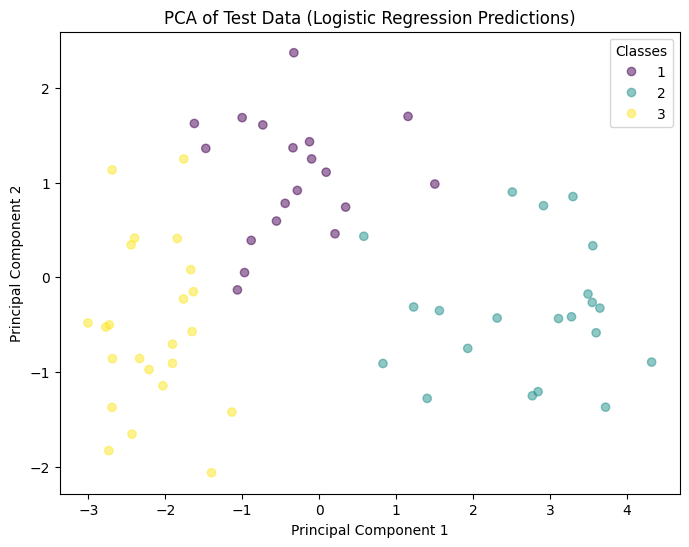

In [ ]:
# TODO: Plot test points colored by predicted label

import matplotlib.pyplot as plt

# Create a scatter plot of the PCA-reduced test data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.5)

# Add a legend for the colors
plt.legend(*scatter.legend_elements(), title="Classes")

# Adding title and labels
plt.title('PCA of Test Data (Logistic Regression Predictions)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()


#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

1) The Logistic Regression model demonstrated strong performance, evidenced by a best cross-validation score of approximately 95.93%. However, the slightly lower test score of about 92.06% suggests a minor discrepancy between training and testing performance. This could indicate slight overfitting but overall, the model worked effectively, particularly in cross-validation. Also inferred from the distinct separation of the three classes in the plot. While there's proximity of some predicted class 1 members to classes 2 and 3, the overall strong delineation suggests effective class differentiation. The model's robustness is evident, though it would be intriguing to compare these results with those from a more complex model.

2) Considering the high accuracy in cross-validation, PCA likely contributed positively to the model's performance. The two-dimensional plot distinctly showcases separate clusters corresponding to the predicted classes, with minimal intermingling of different colors. This clear demarcation indicates the model's proficiency in class discrimination, as vividly illustrated in the PCA plot.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

From the examples, lectures provided in class, as well as online tools and libraries.

1. In what order did you complete the steps?

In the order that they were listed.


1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

I used AI to help debug errors in my code. I also used it to help me understand the results better and answer some questions. It was easier to use AI to understand results rather than dig online for resources or through old lecture notes. I used prompts such as "What does this error mean and how do I fix it", or "What do these results mean"

1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I did have some challenges remembering how to perform specific tasks from the PCA lectures. I had to use quite a bit of AI and old notes to help me be successful.

*DESCRIBE YOUR PROCESS HERE*

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed).

In [ ]:
# TODO: Scale feature matrix

from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your original dataset
# Separate the features (assuming the last column is the target)
X = data.iloc[:, :-1]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

# Now, X_scaled is the scaled feature matrix ready for clustering


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

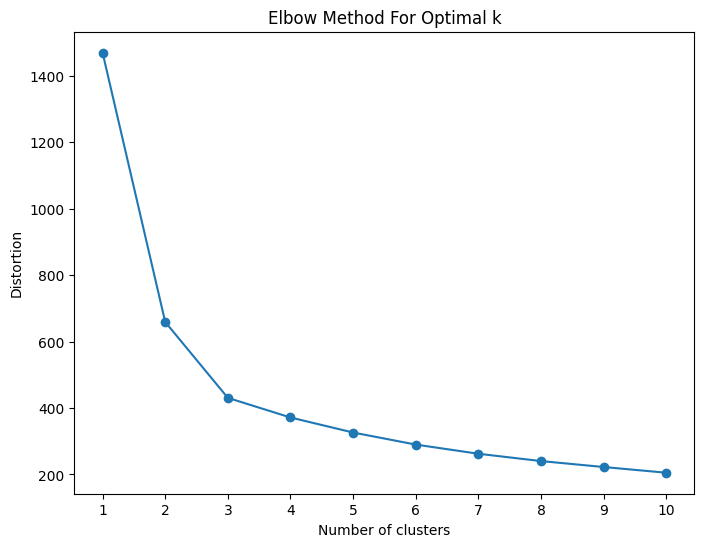

In [ ]:
# TODO: Use the elbow method to determine the optimal number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of k we want to try
k_values = range(1, 11)

# Empty list for distortions
distortions = []

# Calculate distortion for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.xticks(k_values)
plt.show()


Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [ ]:
# TODO: Implement K-means with the number of clusters determined in the previous step

# Implement K-means with the optimal number of clusters
optimal_k = 3  # Replace with the number you determined from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the KMeans model to the scaled data
kmeans.fit(X_scaled)

# Get the cluster labels (predicted classes) for each data point
cluster_labels = kmeans.labels_

# If needed, you can also get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Now you have the cluster labels assigned to each data point in the dataset


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# TODO: Calculate the three different validation metrics

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score: ", silhouette_avg)

# Calinski-Harabasz Score
calinski_harabasz = calinski_harabasz_score(X_scaled, cluster_labels)
print("Calinski-Harabasz Score: ", calinski_harabasz)

# Davies-Bouldin Score
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)
print("Davies-Bouldin Score: ", davies_bouldin)


Silhouette Score:  0.40072705527512986
Calinski-Harabasz Score:  249.7841749161647
Davies-Bouldin Score:  0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

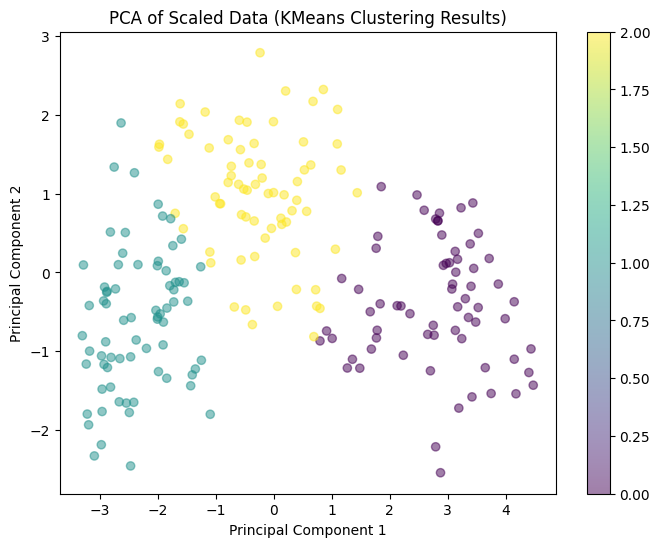

In [ ]:
# TODO: Plot clustering results

# Apply PCA to reduce the dimensions to two
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Create a scatter plot of the PCA-reduced data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)

# Add a color bar for the clusters
plt.colorbar(scatter)

# Adding title and labels
plt.title('PCA of Scaled Data (KMeans Clustering Results)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()


### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [ ]:
# TODO: Find the number of principal components using explained variance ratio

from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA on the scaled data
pca.fit(X_scaled)

# Calculate the cumulative sum of explained variance ratio
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Determine the number of components required to explain at least 95% of the variance
n_components = (cumulative_variance_ratio < 0.95).sum() + 1

print("Number of principal components explaining at least 95% variance:", n_components)


Number of principal components explaining at least 95% variance: 3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [ ]:
# TODO: Use PCA to transform the data

# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Fit and transform the scaled data using PCA
X_pca = pca.fit_transform(X_scaled)


In [ ]:
# TODO: Implement K-means with the transformed data

# Assuming the optimal number of clusters is still the same
optimal_k = 3  # Replace with your determined number if different

# Initialize and fit KMeans on the PCA-transformed data
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca.fit(X_pca)

# Get the cluster labels
cluster_labels_pca = kmeans_pca.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# TODO: Calculate the three different validation metrics

# Silhouette Score
silhouette_avg_pca = silhouette_score(X_pca, cluster_labels_pca)
print("Silhouette Score (PCA):", silhouette_avg_pca)

# Calinski-Harabasz Score
calinski_harabasz_pca = calinski_harabasz_score(X_pca, cluster_labels_pca)
print("Calinski-Harabasz Score (PCA):", calinski_harabasz_pca)

# Davies-Bouldin Score
davies_bouldin_pca = davies_bouldin_score(X_pca, cluster_labels_pca)
print("Davies-Bouldin Score (PCA):", davies_bouldin_pca)


Silhouette Score (PCA): 0.41008236393503883
Calinski-Harabasz Score (PCA): 260.2885065635684
Davies-Bouldin Score (PCA): 0.9030688438741871


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [ ]:
# TODO: Display results

import pandas as pd

# Assuming you have stored the metrics from both steps in the following variables:
# silhouette_avg, calinski_harabasz, davies_bouldin for the original data
# silhouette_avg_pca, calinski_harabasz_pca, davies_bouldin_pca for the PCA-transformed data

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
    'Original Data': [silhouette_avg, calinski_harabasz, davies_bouldin],
    'PCA Transformed Data': [silhouette_avg_pca, calinski_harabasz_pca, davies_bouldin_pca]
})

# Set 'Metric' as the index
results_df.set_index('Metric', inplace=True)

# Print the DataFrame
print(results_df)


                         Original Data  PCA Transformed Data
Metric                                                      
Silhouette Score              0.400727              0.410082
Calinski-Harabasz Score     249.784175            260.288507
Davies-Bouldin Score          0.927871              0.903069


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

1) The chosen optimal number of clusters for the seeds dataset, based on the context and validation metrics (Silhouette score of 0.400727 and Calinski-Harabasz score of 249.784175), seemed appropriate and well-aligned with the dataset's characteristics.

2) The comparison of PCA plots from Part 1 and Part 2 indicated consistent clustering patterns. This suggests that the KMeans clustering (Silhouette score improving from 0.400727 to 0.410082) effectively captured similar groupings as identified in the supervised approach of Part 1.

3) The PCA analysis used 3 principal components and showed a slight improvement in clustering results. The increase in the Calinski-Harabasz score from 249.784175 to 260.288507 and a decrease in the Davies-Bouldin score from 0.927871 to 0.903069 indicate better cluster definition and separation with PCA.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?

From the examples, lectures provided in class, as well as online tools and libraries.

1. In what order did you complete the steps?

In the order that they were listed.


1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?

I used AI to help debug errors in my code. I also used it to help me understand the results better and answer some questions. It was easier to use AI to understand results rather than dig online for resources or through old lecture notes. I used prompts such as "What does this error mean and how do I fix it", or "What do these results mean"

1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I did have some challenges remembering how to perform specific tasks from the lectures. I had to use quite a bit of AI and old notes to help me be successful.



*DESCRIBE YOUR PROCESS HERE*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

Working on this assignment was both challenging and rewarding. I really enjoyed the process of exploring different aspects of machine learning, especially fine-tuning the Logistic Regression model and seeing how small adjustments could make a big impact on the results. It was fascinating to dive into PCA and understand how it transforms the data. However, I must admit, figuring out the best number of clusters using the elbow method was a bit tricky—it's not always clear-cut and requires a bit of intuition. Despite this, I found the whole experience quite motivating. There's something really satisfying about piecing together these analytical puzzles and seeing the theory come to life in a practical, hands-on way.